**1.What is Boosting in Machine Learning? Explain how it improves weak learners.**  

Boosting is an ensemble technique that trains models sequentially, where each new model focuses more on the errors made by previous models. It improves weak learners by reducing bias and converting them into a strong predictive model.

---

**2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**  

AdaBoost increases weights of misclassified samples and combines models using weighted voting, whereas Gradient Boosting trains models sequentially by optimizing a loss function using gradient descent.

---

**3. How does regularization help in XGBoost?**

Regularization in XGBoost (L1 and L2) penalizes complex trees, controls overfitting, and improves generalization by limiting tree depth and leaf weights.

---

**4. Why is CatBoost considered efficient for handling categorical data?**  

CatBoost handles categorical features internally using target-based encoding, avoids one-hot encoding, and reduces overfitting caused by category leakage.

---

**5. What are some real-world applications where boosting techniques are preferred over bagging methods?**  

Boosting is preferred in credit risk prediction, fraud detection, medical diagnosis, and customer churn prediction, where high accuracy and bias reduction are critical.
---

**10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. Describe your step-by-step data science pipeline using boosting techniques.**  

1. Data Preprocessing:

Handle missing values (median for numeric, mode for categorical).

Encode categorical variables (CatBoost preferred for raw categorical data).

2. Model Choice:

CatBoost for mixed data & missing values

XGBoost for high performance and control

AdaBoost for simpler, smaller datasets

3. Hyperparameter Tuning:

Use GridSearchCV / RandomizedSearchCV

Tune learning rate, depth, estimators

4. Evaluation Metrics:

ROC-AUC, Precision, Recall, F1-score

Focus on Recall to minimize false negatives

5. Business Benefit:

Better default detection

Reduced financial risk

Improved credit decision accuracy

---

# Practial Questions

In [1]:
# 6.Write a Python program to:
# ● Train an AdaBoost Classifier on the Breast Cancer dataset
# ● Print the model accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# Train AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost Accuracy: {accuracy:.3f}")


AdaBoost Accuracy: 0.971


In [4]:
# 7. Write a Python program to:
# ● Train a Gradient Boosting Regressor on the California Housing dataset
# ● Evaluate performance using R-squared score

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load data
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# Train model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Evaluate
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2:.3f}")


R-squared Score: 0.780


In [5]:
# 8. Write a Python program to:
# ● Train an XGBoost Classifier on the Breast Cancer dataset
# ● Tune the learning rate using GridSearchCV
# ● Print the best parameters and accuracy

from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# Grid Search
param_grid = {'learning_rate': [0.01, 0.05, 0.1]}
model = XGBClassifier(eval_metric='logloss', random_state=42)

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print(f"Accuracy: {acc:.3f}")


Best Parameters: {'learning_rate': 0.1}
Accuracy: 0.959


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


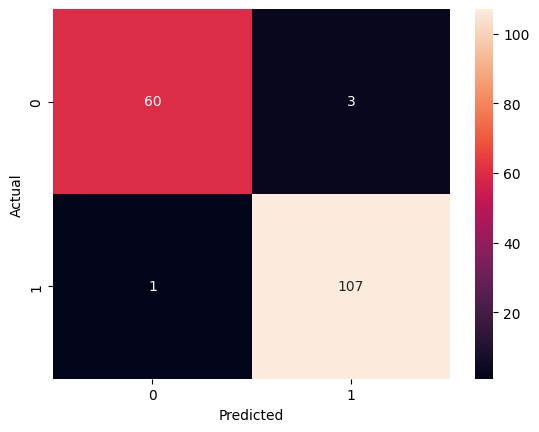

In [7]:
# 9. Write a Python program to:
# ● Train a CatBoost Classifier
# ● Plot the confusion matrix using seaborn

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

# Train model
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
